# <span style="color:green"> Numerical Simulation Laboratory: Numerical Exercises 10 </span>
# <span style="color:blue"> Exercise 10.1 </span>

## <span style="color:steelblue"> Comment on the C++ code - Structure </span> 
The C++ code is based on the class SimulAnnealing (simulannealing.h). In particular, it contains:
1. Data:
    - $X$, a vector of $N_x$ Vector elements (d-dimensional points, see vector.h) that stores the points of a generic path (in any dimension) and allows for a direct calculation of distances (Distance(Vector), Distance2(Vector) methods). For this problem, we will use 2D vectors;
    - Path, the vector\<unsigned int> which stores the indices referred to the ordered path connecting the points X;
    - $L$, the cost (length) of each path, computed with the L function (L1 or L2);
    - $T$, the temperature at which the mutation cycles occur.
2. Methods:
    - *Generation of the point pattern*: 
        * $\mathrm{RandomCube(l)}$, which creates $N_x$ points in a $d$-dimensional cube of edge $l$; 
        * $\mathrm{RandomSphSurface(R)}$, which generates $N_x$ points on a $d$-dimensional spherical surface of radius $R$ (in 2D, this is just a circumference);
    - *Mutation*: the mutation is performed with 4 "simple".
        * $\mathrm{Swap(gene^1, gene^2)}$: swaps two genes of the current individual (path);
        * $\mathrm{Permute(b, first, last)}$: permutes two blocks of $b$ genes at positions $first$, $last$ (the latter is by default set to be the contiguous position after the first block);
        * $\mathrm{Shift(pos, n, m)}$: shifts $n$ genes (starting from the position $pos$) by $m$ positions to the right ($m$>0) or left ($m$<0);
        * $\mathrm{Invert(pos, n)}$: simply flips the $n$ genes following $pos$;
        * Lastly, the function $\mathrm{Mutate(double\thinspace p_i)}$ performs one of the four mutation on the current path by assigning a probability $p_i$ to each simple mutation. The new mutated path is then accepted or rejected by means of the Metropolis algorithm and the Boltzmann weight $$e^{-\beta\Delta L}=e^{-\beta(L_{new}-L)}$$ Thus at high temperatures the algorithm can explore (ideally) any possible configuration, whereas low temperatures favour the paths with a lower cost. The Simulated Annealing method consists of a series of cycles at a definite temperature $T$ (each starting from the last configuration of the previous cycle) gradually decreasing until $Tmin\sim 0$ is reached.               

## <span style="color:steelblue"> Comment on the C++ code - Usage </span>
The code is structured in such a way that all the fundamental interactions with the user occur via the file **input.dat**. Indeed, in this file one can set the number of points of the path, their spatial dimension and their distribution (inside a square 's' or on a circumference 'c'), the radius/edge of these regions, the number of mutation cycles at fixed temperature, the norm $L^p$, the temperature range $[T_{min}, T_{max}]$ and the number of cycles $T_{cycles}$. Therefore, the program performs $T_{cycles}$ cycles at the temperatures:
 $$T=T_{max}+(T_{min}-T_{max})*\frac{i-1}{T_{cycles}-1}, \quad i\in{1,...T_{cycles}}$$ All the output files are **generated according to the selected parameters**, hence their name will be $\textit{[keyword]+[1|2]+[S|C].out}$ to specify the content (the path sequence or the $L$ values) and the parameters adopted. In particular, the sequences of path lengths (as a function of the iterations) are collected in the folder $\mathrm{PathLengths}$. <br>
The _reading-computing-outputting_ cycle is iterated in the $\mathrm{main}$ function until the user decides to stop the program. In this way, one can perform multiple simulations (setting the input.dat file) by launching the program only one time. The output files are overwritten/cleaned automatically.<br>
**Note that each the number of mutation steps is the same for each Simulated Annealing iteration.** This choice allows to quickly generate the output files, without the need to restart the program 

## <span style="color:steelblue"> Comment on the Python code </span>
Once the four desired configurations have been generated with the C++ program, the results are plotted in the next three sections. We first consider the representation of the path lengths as a function of the iterations (at fixed temperature), for each temperature explored in the interval $[T_{min}, T_{max}]$, then we highlight the results of the last cycle (carried out at the lowest temperature value $Tmin\sim 0$) and the last path explored.
<br>The following block of code contains the generic functions which read the different types of data produced by the C++ program.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def ReadPath(filename):
    Npoints, d, L = [None]*3
    _type = [int, int, float]
    Point, Temp = [], []
    with open(filename) as file:
        [d, Npoints, L] = [_type[i](file.readline().split()[1]) for i in range(0, 3)]
        Point = [[] for i in range(0, d)]
        for line in file:
            Temp = line.split()
            for i in range(0, d):
                Point[i].append(float(Temp[i+1]))
    return Npoints, d, L, Point

def ReadParameters(filename):
    with open("Esercizio10.1/"+filename) as file:
        file.readline()
        Norm = int(file.readline().split()[1])
        A = file.readline().split()
        [Tmin, Tmax] = [float(A[i]) for i in range(1, 4, 2)]#, float(file.readline().split()[3])
        Tcycles = int(file.readline().split()[1])
    return Norm, Tmin, Tmax, Tcycles
        
def ReadL(filename):
    with open("Esercizio10.1/"+filename) as file:
        MutCycles = int(file.readline().split()[1])
        T, L = float(file.readline().split()[1]), []
        for line in file:
            L.append(float(line))
    return MutCycles, L, T

## <span style="color:steelblue"> Simulated Annealing Iterations </span>
In this section we consider the representation of path lengths as a function of the iterations (at fixed temperature), for each temperature explored in the interval $[T_{min}, T_{max}]$. The plots show how at high $T$ the path lenghts (depicted in light gray) oscillate randomly around high values, while for lower temperatures (darker lines) stabilize in a neighbourhood of the optimal value. Lastly, the final cycle is represented in red.

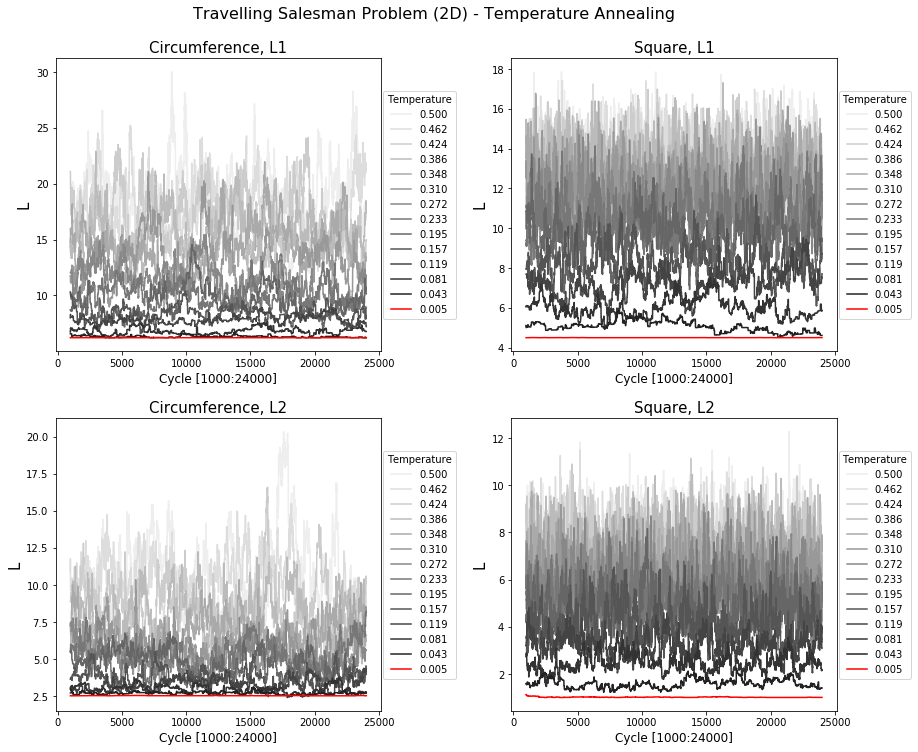

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
ax = ax.flatten()
fig.suptitle("Travelling Salesman Problem (2D) - Temperature Annealing", y = 0.94, size=16)
fig.subplots_adjust(wspace=0.4, hspace=0.23)
fileID = ["1C", "1S", "2C", "2S"]
title = ["Circumference, L1", "Square, L1", "Circumference, L2", "Square, L2"]
MutCycles, L = [[] for i in range(0, len(fileID))], [[] for i in range(0, len(fileID))]
Skip = 1000     ###  Skip first __ values (better plot)

for n in range(0, len(fileID)):
    Norm, Tmin, Tmax, Tcycles = ReadParameters("param"+fileID[n]+".out")
    
    for i in range(0, Tcycles):
        MutCycles[n], L[n], T = ReadL("PathLengths/L"+fileID[n]+str(i+1)+".out")
        if (i != Tcycles-1): # Color = different gray levels
            ax[n].plot(np.arange(Skip, len(L[n])), L[n][Skip:len(L[n])], label=f"{T:.3f}", 
                       color = str((Tcycles-i)/(Tcycles+1)))
        else: # Last temperature cycle -> Color = red
            ax[n].plot(np.arange(Skip, len(L[n])), L[n][Skip:len(L[n])], label=f"{T:.3f}", color = "red")
    
    ax[n].set_title(title[n], fontsize=15)
    ax[n].set_xlabel(f"Cycle [{Skip}:{MutCycles[n]}]", fontsize=12)
    ax[n].set_ylabel("L", fontsize=15)
    ymin, ymax = ax[n].get_ylim()
    ax[n].legend(prop={'size': 10}, loc="center left", title="Temperature", bbox_to_anchor=(0.99, 0.5))

plt.show()

## <span style="color:steelblue"> Last (Best) Path </span>
The last path, previously depicted in red, is now represented in a dedicated plot. For a suitable choice of $T_{min}$ and of the number of mutation steps, these graphs should be nearly flat, as the algorithm has achieved to generate the optimal path.

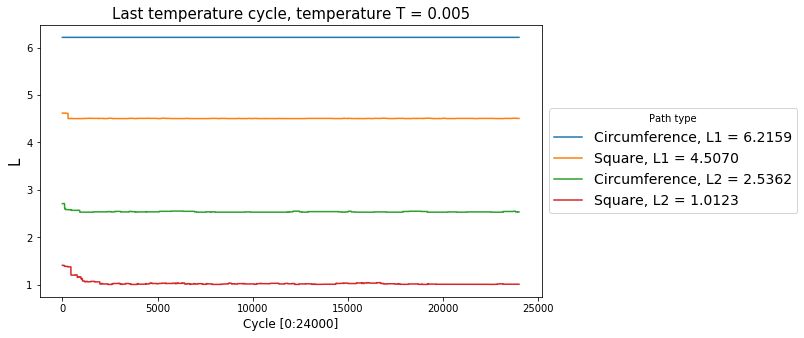

In [3]:
BestL = [L[n][len(L[n])-1] for n in range(0, len(L))]
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title(f"Last temperature cycle, temperature T = {T}", fontsize=15)
ax.set_xlabel(f"Cycle [0:{MutCycles[n]}]", fontsize=12)
ax.set_ylabel("L", fontsize=15)
lab = ["Circumference, L1", "Square, L1", "Circumference, L2", "Square, L2"]

for n in range(0, len(fileID)):
    ax.plot(np.arange(0, len(L[n])), L[n], label=str(lab[n])+" = "+f"{BestL[n]:.4f}")
    
ax.legend(prop={'size': 14}, title="Path type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## <span style="color:steelblue"> Path </span>
In this section we represent the best path of each configuration. In particular, for a suitable choice of initial parameters, the best path for a circular distribution can be easily verified: the points shall be connected in a contiguous way, with all the sub-paths lying on the hypothetical circumference (thus no chords should appear). Also, the total length $L$ obtained via the $L^1$ norm should be less than $2\pi R$ (in general $L$ is very close to $2\pi R$, for a path composed of a sufficiently high number of nodes).

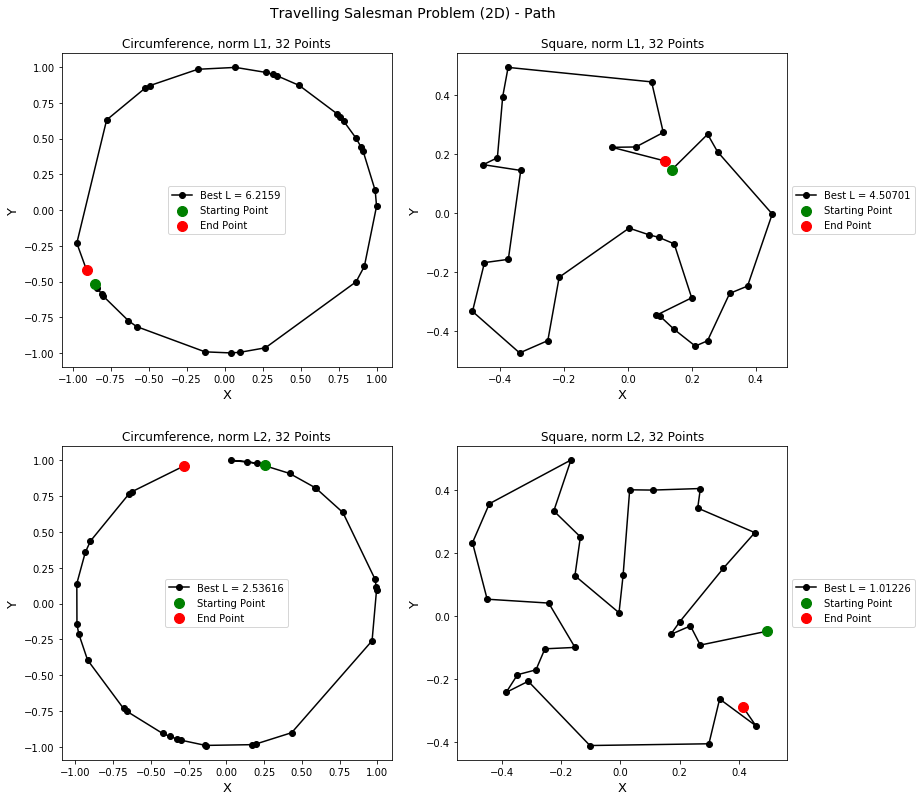

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax = ax.flatten()
fig.suptitle("Travelling Salesman Problem (2D) - Path", y = 0.93, size=14)
fig.subplots_adjust(hspace=0.25)
fileID = ["1C", "1S", "2C", "2S"]
title = ["Circumference, norm L1", "Square, norm L1", 
         "Circumference, norm L2", "Square, norm L2"]

for p in range(0, 4):
    Npoints, d, L, Point = ReadPath("Esercizio10.1/Path"+fileID[p]+".out")
    ax[p].plot(Point[0], Point[1], '-o', label=f"Best L = {L}", color="black")
    ax[p].legend(prop={'size': 10})
    ax[p].scatter(Point[0][0], Point[1][0], color="green", s=100, zorder=10, label="Starting Point")
    ax[p].scatter(Point[0][Npoints-1], Point[1][Npoints-1], color="red", s=100, zorder=10, label="End Point")
    ax[p].set_title(title[p]+f", {Npoints} Points")
    ax[p].set_xlabel("X", fontsize=13)
    ax[p].set_ylabel("Y", fontsize=13)
    if (p%2==1):
        ax[p].legend(prop={'size': 10}, loc="center left", bbox_to_anchor=(1, 0.5))
    else:
        ax[p].legend(prop={'size': 10})
        
plt.show()

## <span style="color:blue"> Exercise 10.2 - Parallel Computing </span> 
We now proceed with the parallelization of the **Genetic Algorithm**. In particular, we use four nodes and the norm $L^1$ to find the best path which connects 32 cities inside a square. The parameters of the simulation are purposely chosen to be *not* the best, in order to show different results achieved by each node. However, this method allows for a faster computation, which can surpass the standard implementation of the Genetic Algorithm: indeed, with fewer computational steps (less than the ones used in *Exercise09*), we can select the best path among the four indipendent nodes, thus improving the efficiency of the algorithm.

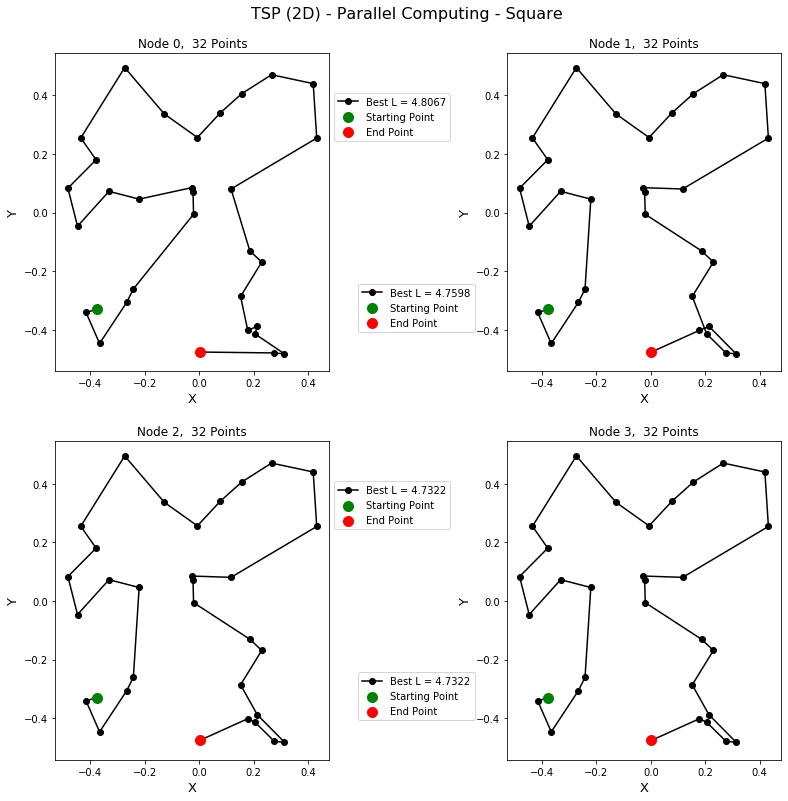

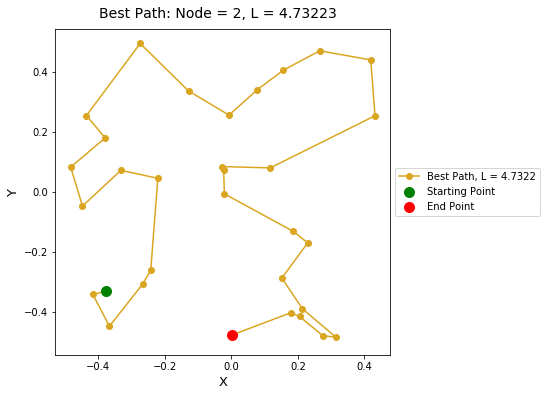

In [5]:
from IPython.core.display import HTML

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax = ax.flatten()
fig.suptitle("TSP (2D) - Parallel Computing - Square", y = 0.93, size=16)
fig.subplots_adjust(hspace=0.22, wspace=0.65)
BestL, BestPath, BestNode = [None]*3

# 4 Nodes, 4 Subplots
for rank in range(0, 4):
    Npoints, d, L, Point = ReadPath("Esercizio10.2/Path1S_rank"+str(rank)+".out")
    if (rank!=0):
        if (L<BestL):
            BestL, BestPath, BestNode = L, Point, rank
    else:
        BestL, BestPath, BestNode = L, Point, rank
        
    ax[rank].plot(Point[0], Point[1], '-o', label=f"Best L = {L:.4f}", color="black")
    ax[rank].legend(prop={'size': 10})
    ax[rank].scatter(Point[0][0], Point[1][0], color="green", s=100, zorder=10, label="Starting Point")
    ax[rank].scatter(Point[0][Npoints-1], Point[1][Npoints-1], color="red", s=100, zorder=10, label="End Point")
    ax[rank].set_title(f"Node {rank},  {Npoints} Points")
    ax[rank].set_xlabel("X", fontsize=13)
    ax[rank].set_ylabel("Y", fontsize=13)
    if (rank%2==1):
        ax[rank].legend(prop={'size': 10}, loc="center right", bbox_to_anchor=(-0.1, 0.2))
    else:
        ax[rank].legend(prop={'size': 10}, loc="center left", bbox_to_anchor=(1, 0.8))

# Best Path, single plot
display(HTML("""<style>.output { display: flex; align-items: center; text-align: center; } </style> """))
fig2, ax2 = plt.subplots(figsize=(6, 6))
fig2.suptitle(f"Best Path: Node = {BestNode}, L = {BestL}", y = 0.93, size=14)
ax2.plot(BestPath[0], BestPath[1], '-o', label=f"Best Path, L = {BestL:.4f}", color="goldenrod")
ax2.legend(prop={'size': 10})
ax2.scatter(BestPath[0][0], BestPath[1][0], color="green", s=100, zorder=10, label="Starting Point")
ax2.scatter(BestPath[0][Npoints-1], BestPath[1][Npoints-1], color="red", s=100, zorder=10, label="End Point")
ax2.set_xlabel("X", fontsize=13)
ax2.set_ylabel("Y", fontsize=13)
ax2.legend(prop={'size': 10}, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

We see that the first two paths are different from the latter. In particular, they have a higher value of length $L^1$ due to few wrong connections. However, by selecting the best among the four, we recover the desired path, represented in the last plot.